<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite; text-align: center;">
<h3 style="font-size: 24px; margin: auto; color: steelblue;">DETECTION DE FAUX BILLETS</h3>
</div>

<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite; text-align: center;">
<h3 style="font-size: 24px; margin: auto; color: steelblue;">PARTIE 1</h3>
</div>

<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">I - IMPORTATION DES LIBRAIRIES</h3>
</div>

In [1]:
# Importation des librairies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc



<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">II - IMPORTATION DU FICHIER DE BASE ET EXPLORATION</h3>
</div>

In [2]:
# Importation du fichier 'billets'
df_billets = pd.read_csv("billets.csv", sep=";")

In [3]:
# Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_billets.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_billets.shape[1]))

Le tableau comporte 1500 observation(s) ou article(s)
Le tableau comporte 7 colonne(s)


In [4]:
# Identification de la nature des données dans chacune des colonnes
df_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
# Affichage des 5 premières lignes de la table
display(df_billets.head())

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [6]:
# Renommage des colonnes
df_billets = df_billets.rename(columns={'is_genuine': 'nature'})
df_billets = df_billets.rename(columns={'diagonal': 'diagonale'})
df_billets = df_billets.rename(columns={'height_left': 'hauteur_gauche'})
df_billets = df_billets.rename(columns={'height_right': 'hauteur_droite'})
df_billets = df_billets.rename(columns={'margin_low': 'marge_inf'})
df_billets = df_billets.rename(columns={'margin_up': 'marge_sup'})
df_billets = df_billets.rename(columns={'length': 'longueur'})

<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">III - ANALYSE DESCRIPTIVE DES BILLETS</h3>
</div>

<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">III.1 - Analyse générale</h3>
</div>

In [7]:
## LE NOMBRE DE BILLETS

In [8]:
# Comptabilisation du nombre de faux billets
billets_nbr_vrais = df_billets[df_billets['nature'] == True].shape[0]
print("Nombre de billets authentiques:", billets_nbr_vrais)

Nombre de billets authentiques: 1000


In [9]:
# Comptabilisation du nombre de faux billets
billets_nbr_faux = df_billets[df_billets['nature'] == False].shape[0]
print("Nombre de billets falsifiés:", billets_nbr_faux)

Nombre de billets falsifiés: 500


In [10]:
## LES DOUBLONS

In [11]:
# Détection des lignes en doublons
billets_doublons = df_billets.duplicated()

# Affichage des lignes en doublon
print(df_billets[billets_doublons])

Empty DataFrame
Columns: [nature, diagonale, hauteur_gauche, hauteur_droite, marge_inf, marge_sup, longueur]
Index: []


In [12]:
## LES VALEURS MANQUANTES

In [13]:
# Détection des valeurs manquantes
billets_valeurs_manquantes = df_billets.isnull().sum()

# Affichage du nombre de valeurs manquantes par colonne
print(billets_valeurs_manquantes)

nature             0
diagonale          0
hauteur_gauche     0
hauteur_droite     0
marge_inf         37
marge_sup          0
longueur           0
dtype: int64


In [14]:
# Calcul du pourcentage de valeurs manquantes par colonne
valeurs_manquantes_pourcentage = (billets_valeurs_manquantes / len(df_billets)) * 100

# Affichage du pourcentage de valeurs manquantes
print(valeurs_manquantes_pourcentage)

nature            0.000000
diagonale         0.000000
hauteur_gauche    0.000000
hauteur_droite    0.000000
marge_inf         2.466667
marge_sup         0.000000
longueur          0.000000
dtype: float64


In [15]:
# Recherche des lignes avec au moins une valeur manquante
billets_lignes_valeurs_manquantes = df_billets[df_billets.isnull().any(axis=1)]

# Affichage des lignes 
display(billets_lignes_valeurs_manquantes.head())

,nature,diagonale,hauteur_gauche,hauteur_droite,marge_inf,marge_sup,longueur
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [16]:
## LES VALEURS NULLES

In [17]:
# Détection des valeurs égales à 0
billets_valeur_0 = (df_billets == 0)

# Affichage du nombre de valeurs nulles ou égales à 0 par colonne
print(billets_valeur_0.sum())

nature            500
diagonale           0
hauteur_gauche      0
hauteur_droite      0
marge_inf           0
marge_sup           0
longueur            0
dtype: int64


In [18]:
## VISUALISATION AVEC UN PAIRPLOT

# Le pairplot est un outil de visualisation qui permet d'explorer les relations entre les différentes variables d'un df.
# Chaque case représente la relation entre 2 variables.

C:\Users\Yassine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


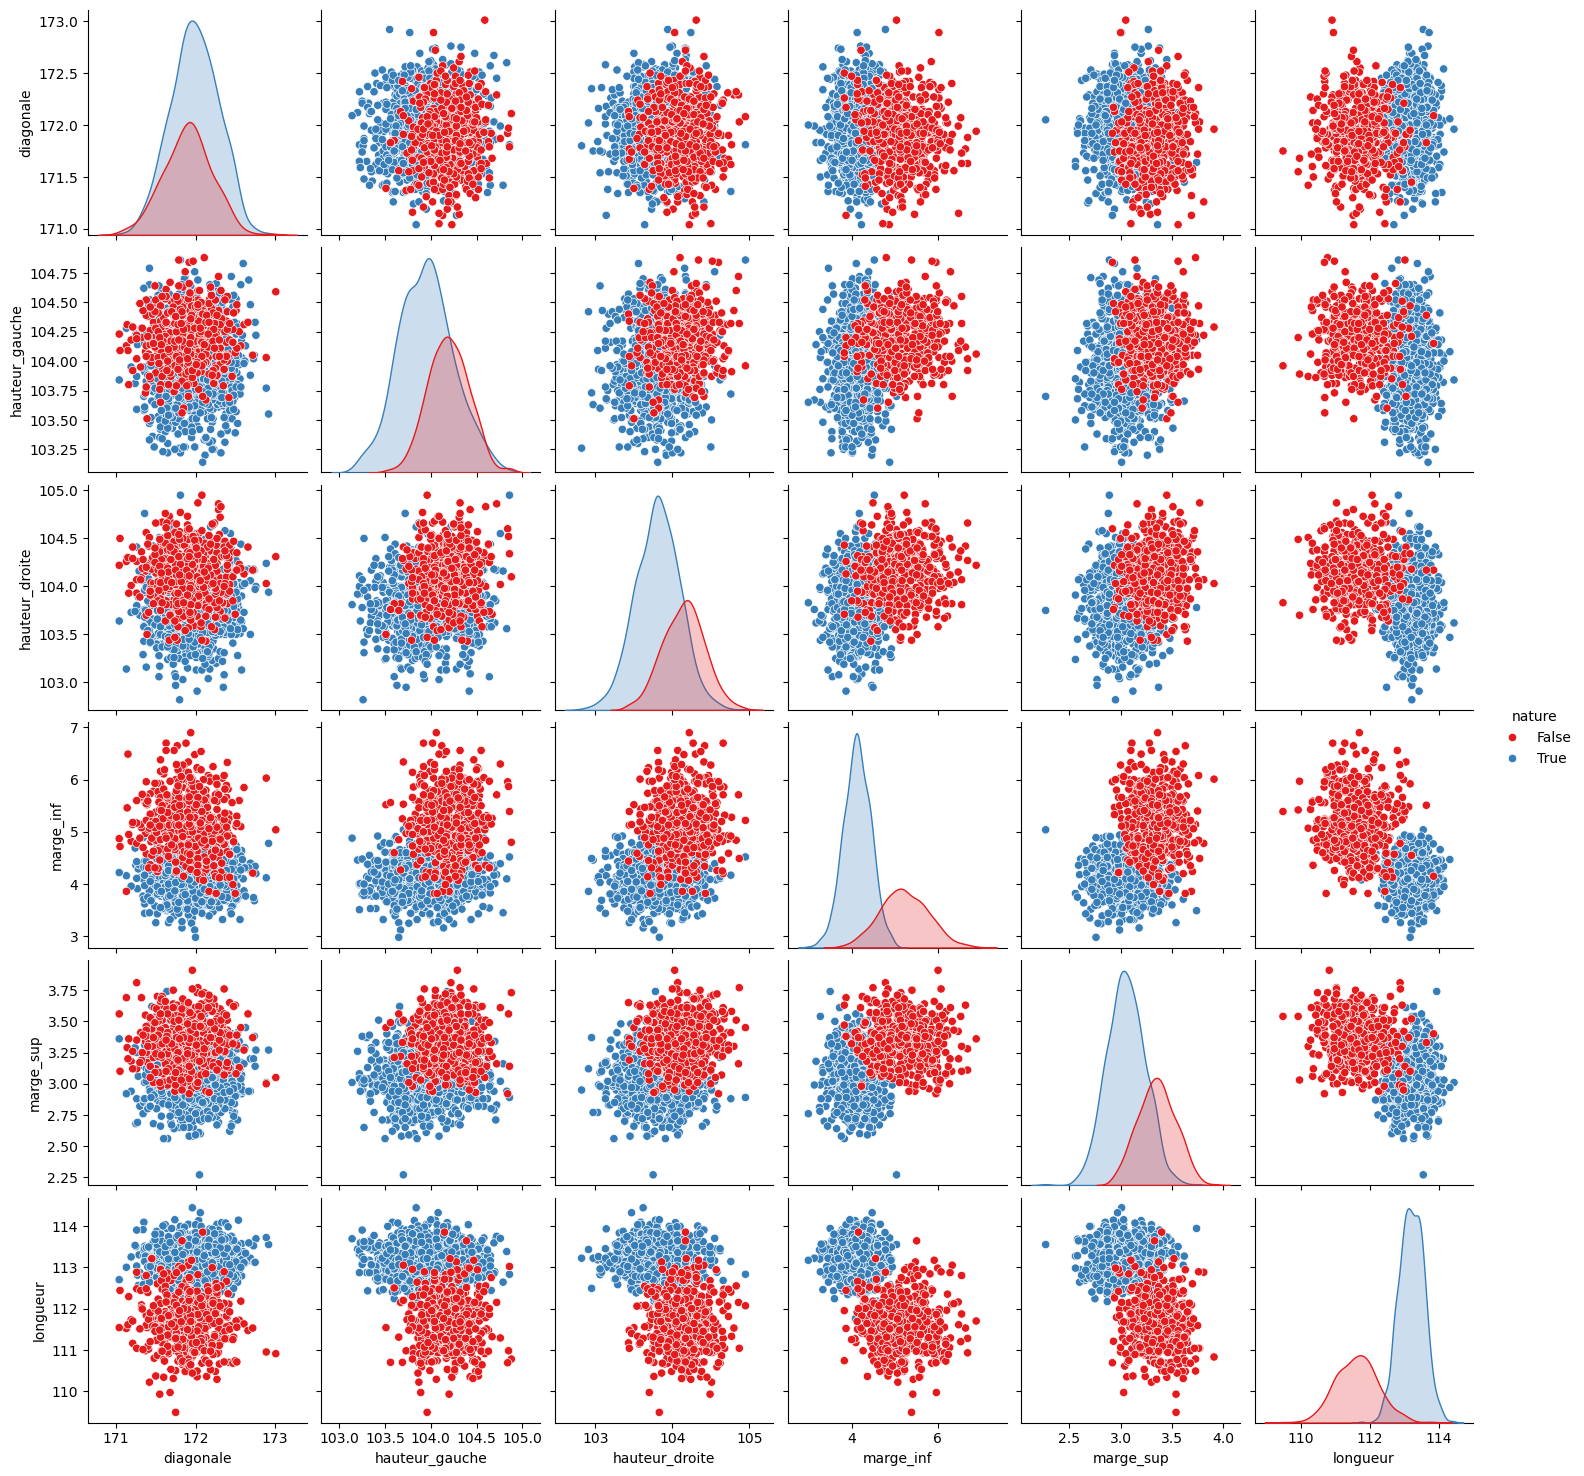

In [19]:
# Création d'un pairplot personnalisé
# Vrais billets = vert
# Faux billets = rouge
sns.pairplot(df_billets, hue='nature', palette = 'Set1')
             
# Je ne peux pas changer la couleur à cause des valeurs manquantes
# sns.pairplot(df_billets, hue='is_genuine', palette={'True': 'green', 'False': 'red'})

In [20]:
## VISUALISATION DE LA DISTRIBUTION DE CHAQUE VARIABLE AVEC UNE BOITE A MOUSTACHE

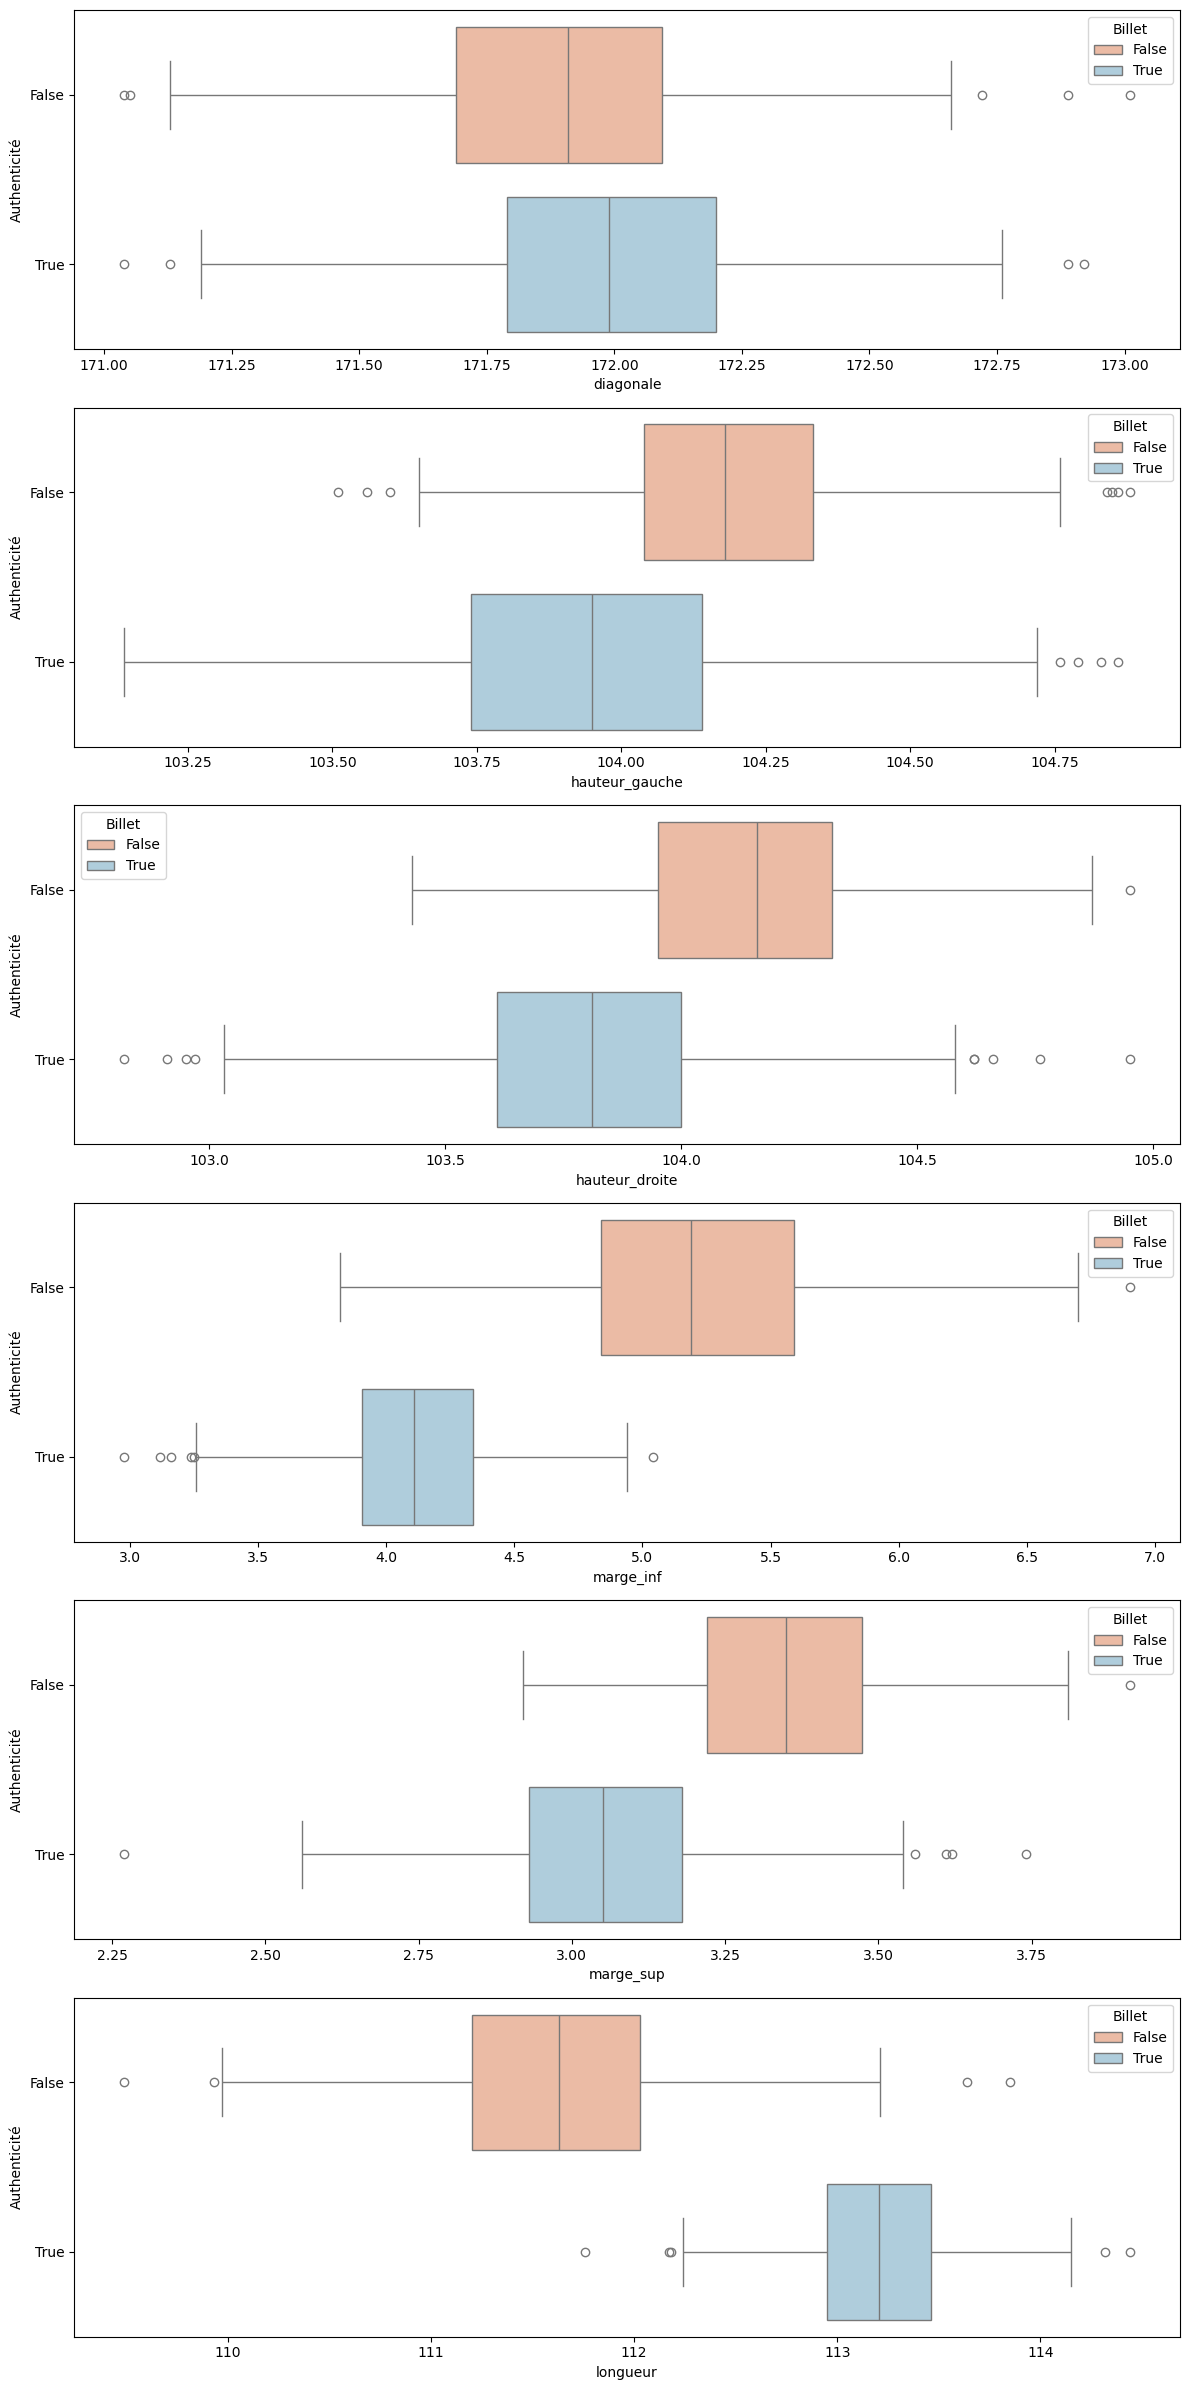

In [21]:
# Création de la figure et des sous-graphiques
fig, axs = plt.subplots(6,1, figsize=(12,24))

# Personnalisation des couleurs
palette = sns.color_palette("RdBu", 2)

# Création des boxplots avec l'argument 'hue' qui remplace 'palette'
sns.boxplot(data=df_billets, x='diagonale', y='nature', hue='nature', palette=palette, ax=axs[0], orient='h')
sns.boxplot(data=df_billets, x='hauteur_gauche', y='nature', hue='nature', palette=palette, ax=axs[1], orient='h')
sns.boxplot(data=df_billets, x='hauteur_droite', y='nature', hue='nature', palette=palette, ax=axs[2], orient='h')
sns.boxplot(data=df_billets, x='marge_inf', y='nature', hue='nature', palette=palette, ax=axs[3], orient='h')
sns.boxplot(data=df_billets, x='marge_sup', y='nature', hue='nature', palette=palette, ax=axs[4], orient='h')
sns.boxplot(data=df_billets, x='longueur', y='nature', hue='nature', palette=palette, ax=axs[5], orient='h')

# Personnalisations supplémentaires
for ax in axs:
    ax.set_ylabel('Authenticité')
    ax.legend(title='Billet')

plt.tight_layout()
plt.show()

In [22]:
# CALCUL DE LA VARIANCE
# L'idée est de visualiser les colonnes dont les valeurs sont le plus dispersées autour de leurs moyennes.

# Calcul de la variance pour chaque colonne
variance_par_colonne = df_billets.var().round(3)

# Affichage des résultats
print(variance_par_colonne)

nature            0.222
diagonale         0.093
hauteur_gauche    0.090
hauteur_droite    0.106
marge_inf         0.441
marge_sup         0.054
longueur          0.762
dtype: float64


<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">III.2 - Analyse des vrais billets</h3>
</div>

In [23]:
# Création d'un df avec uniquement les vrais billets
df_billets_true = df_billets[df_billets['nature'] == True]


In [24]:
# Affichage des informations principales
df_billets_true.describe().round(3)

,diagonale,hauteur_gauche,hauteur_droite,marge_inf,marge_sup,longueur
count,1000.000,1000.000,1000.000,971.000,1000.000,1000.000
mean,171.987,103.949,103.809,4.116,3.052,113.202
std,0.300,0.300,0.292,0.319,0.186,0.360
min,171.040,103.140,102.820,2.980,2.270,111.760
25%,171.790,103.740,103.610,3.905,2.930,112.950
50%,171.990,103.950,103.810,4.110,3.050,113.205
75%,172.200,104.140,104.000,4.340,3.180,113.460
max,172.920,104.860,104.950,5.040,3.740,114.440


<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">III.3 - Analyse des faux billets</h3>
</div>

In [25]:
# Création d'un df avec uniquement les vrais billets
df_billets_false = df_billets[df_billets['nature'] == False]

In [26]:
# Affichage des informations principales
df_billets_false.describe().round(3)

,diagonale,hauteur_gauche,hauteur_droite,marge_inf,marge_sup,longueur
count,500.000,500.000,500.000,492.000,500.000,500.000
mean,171.901,104.190,104.144,5.216,3.350,111.631
std,0.307,0.224,0.271,0.554,0.180,0.616
min,171.040,103.510,103.430,3.820,2.920,109.490
25%,171.690,104.040,103.950,4.840,3.220,111.200
50%,171.910,104.180,104.160,5.190,3.350,111.630
75%,172.092,104.332,104.320,5.592,3.472,112.030
max,173.010,104.880,104.950,6.900,3.910,113.850


<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">IV - REMPLACEMENTS DES VALEURS MANQUANTES</h3>
</div>

<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">IV.1 - REGRESSION LINEAIRE MULTIPLE</h3>
</div>

In [27]:
from sklearn.linear_model import LinearRegression

## PREPARATION DES DONNEES

# Séparation des variables explicatives (X) et de la variable cible (y)
X = df_billets[['diagonale', 'hauteur_gauche', 'hauteur_droite', 'marge_sup', 'longueur']]
y = df_billets['marge_inf']

# Création d'un df avec les valeurs manquantes
X_missing = df_billets[df_billets['marge_inf'].isnull()][['diagonale', 'hauteur_gauche', 'hauteur_droite', 'marge_sup', 'longueur']]

In [28]:
## IMPUTATION DES VALEURS MANQUANTES DANS LES DONNEES D'ENTRAINEMENT

# Création d'un imputeur
imputer = SimpleImputer(strategy='mean')

# Entraînement et transformation des données
X_train_imp = imputer.fit_transform(X)

In [29]:
## DIVISION DES DONNEES

# Sauvegarde des lignes correspondantes uniquement aux valeurs y
X_train_imp_dropna = X_train_imp[~np.isnan(y)] 
X_train, X_test, y_train, y_test = train_test_split(X_train_imp_dropna, y.dropna(), test_size=0.2, random_state=42)

In [30]:
## CREATION ET ENTRAINEMENT DU MODELE
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [31]:
## PREDICTION DES VALEURS MANQUANTES

# Cration d'une copie pour éviter de modifier les données originales
X_missing_no_names = X_missing.copy()

# Remplacement des noms par des index numériques
X_missing_no_names.columns = range(X_missing.shape[1])

predicted_values = model.predict(X_missing_no_names)

In [32]:
## REMPLACEMENT DES VALEURS MANQUANTES
df_billets.loc[df_billets['marge_inf'].isnull(), 'marge_inf'] = predicted_values

In [33]:
display(df_billets.head())

,nature,diagonale,hauteur_gauche,hauteur_droite,marge_inf,marge_sup,longueur
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [34]:
# Vérification des valeurs manquantes
billets_valeurs_manquantes_verif = df_billets.isnull().sum()

# Affichage du nombre de valeurs manquantes par colonne
print(billets_valeurs_manquantes_verif)

nature            0
diagonale         0
hauteur_gauche    0
hauteur_droite    0
marge_inf         0
marge_sup         0
longueur          0
dtype: int64


In [35]:
import statsmodels.api as sm

# Ajouter une constante pour l'ordonnée à l'origine
X_train_const = sm.add_constant(X_train)

# Ajuster le modèle
model_sm = sm.OLS(y_train, X_train_const).fit()

# Afficher le résumé
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              marge_inf   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     198.7
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          3.54e-153
Time:                        14:02:53   Log-Likelihood:                -825.58
No. Observations:                1170   AIC:                             1663.
Df Residuals:                    1164   BIC:                             1694.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.3960     11.266      1.810      0.0

<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">IV.21 - Vérification des hypothèses de régression linéaire : la colinéarité </h3>
</div>

In [36]:
## Le but de la colinéarité est de vérifier s'il existe des corrélations trop fortes entre les variables indépendantes.
## Une colinéarité élevée peut rendre l'interprétation des coefficients de régression difficile.

In [37]:
## OUTIL DE VERIFICATION DE COLINEARITE 1 : LA MATRICE DE CORRELATION
# Il s'agit de calculer la matrice de corrélation entre toutes les variables.
# ==> Les coefficients de corrélation élevés (proche de 1 ou de -1) indiquent une forte colinéarité.

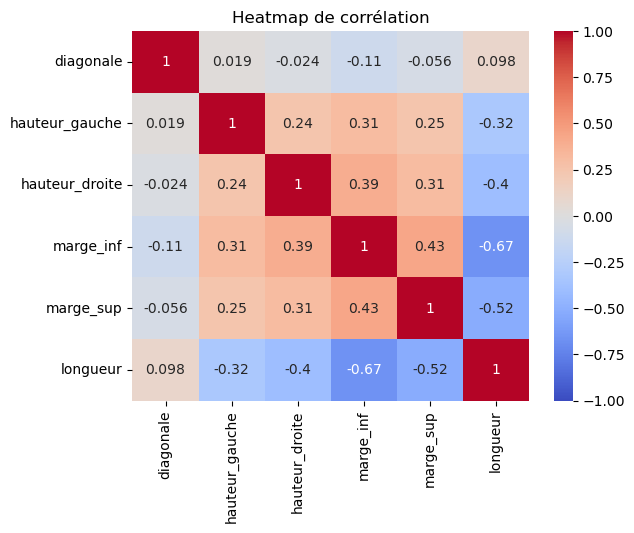

In [38]:
# Séléction uniquement des colonnes numériques
df_billets_numerique = df_billets.select_dtypes(include=['float64'])

# Calcul de la matrice de corrélation
billets_heatmap = df_billets_numerique.corr()

# Création de la heatmap
sns.heatmap(billets_heatmap, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Heatmap de corrélation')
plt.show()

In [39]:
## OUTIL DE VERIFICATION DE COLINEARITE 2 : LE FACTEUR D'INFLACTION DE LA VARIANCE (VIF)
# Il s'agit de calculer le VIF pour chaque variable.
# ==> Un VIF élevé (supérieur à 10) indique une forte colinéarité.

In [40]:
# Calcul du VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_variables = df_billets[['diagonale','hauteur_gauche', 'hauteur_droite', 'marge_sup', 'longueur']]
billets_vif = pd.DataFrame()
billets_vif["feature"] = vif_variables.columns
billets_vif["VIF"] = [variance_inflation_factor(vif_variables.values, i) for i in range(vif_variables.shape[1])]

print(billets_vif)
 

          feature            VIF
0       diagonale  169341.929149
1  hauteur_gauche  112879.408271
2  hauteur_droite  100054.247709
3       marge_sup     260.785987
4        longueur   22676.458356


<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">IV.22 - Vérification des hypothèses de régression linéaire : l'homoscédasticité </h3>
</div>

In [41]:
## L'homoscédasticité permet de vérifier si la variance des résidus (différence entre les valeurs prédites et les valeurs
## réelles) est constante pour toutes les valeurs prédites.

In [42]:
## OUTIL DE VERIFICATION D'HOMOSCEDASTICITE 1 : LE GRAPHIQUE DES RESIDUS
# Il s'agit de tracer les résidus en fonction des valeurs prédites. 
# ==> Si la dispersion des points est constante le long de l'axe des valeurs prédites, l'hypothèse d'homoscédasticité est vérifiée.

In [43]:
# Séléction de la variable cible (y) et des variables explicatives (X)
X = df_billets[['hauteur_gauche', 'hauteur_droite', 'marge_sup', 'longueur']]
y = df_billets['marge_inf']

# Ajout d'une constante pour l'intercept
X = sm.add_constant(X)

# Ajustement du modèle
model = sm.OLS(y, X).fit()

In [44]:
# Obtention des résidus
residuals = model.resid

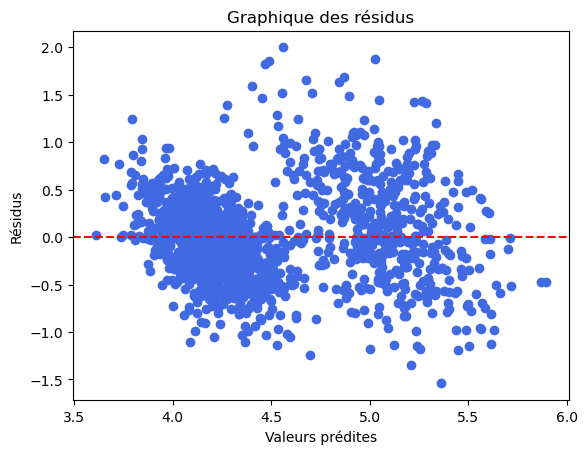

In [45]:
# Visualisation du graphique des résidus en fonction des valeurs prédites
plt.scatter(model.fittedvalues, residuals, color='royalblue')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Graphique des résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [46]:
# INTERPRETATION
# Les résidus sont répartis aléatoirement autour de la ligne horizontale à zéro, ce qui indique que le modèle est adéquat.

In [47]:
## OUTIL DE VERIFICATION D'HOMOSCEDASTICITE 2 : LE TEST DE BREUSCH PAGAN
# Il s'agit de vérifier formellement l'hypothèse d'homoscédasticité.

In [48]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Ajustement du modèle
model = sm.OLS(y, X).fit()

# Test de Breusch-Pagan
_, pvalue, _, f_stat = het_breuschpagan(model.resid, model.model.exog)
print('p-value du test de Breusch-Pagan:', pvalue)

# Interprétation
if pvalue < 0.05:
    print("On rejette l'hypothèse nulle d'homoscédasticité. Il y a de l'hétéroscédasticité.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle d'homoscédasticité.")

p-value du test de Breusch-Pagan: 5.986400029853967e-17
On rejette l'hypothèse nulle d'homoscédasticité. Il y a de l'hétéroscédasticité.


In [49]:
# INTERPRETATION
# Si p-valeur < 0.05, on rejette l'hypothèse nulle d'homoscédasticité ==> il y a de l'hétéroscédasticité dans les données.
# Si p-valeur > 0.05, on ne peut pas rejeter l'hypothèse nulle ==> l'homoscédasticité est respectée.

<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">IV.23 - Vérification des hypothèses de régression linéaire : la normalité des résidus </h3>
</div>

In [50]:
## La normalité des résidus permet de vérifier si les résidus suivent une distribution normale.

In [51]:
## OUTIL DE VERIFICATION DE NORMALITE DES RESIDUS 1 : L'HISTOGRAMME DES RESIDUS
# Il s'agit de tracer l'histogramme des résidus.
#==> Si la distribution est approximativement normale, l'hypothèse est vérifiée.

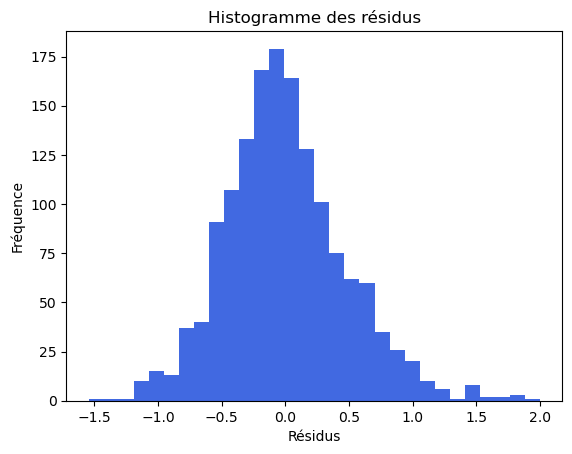

In [52]:
# Histogramme des résidus
plt.hist(residuals, bins=30, color='royalblue')  # 30 est un nombre de classes arbitraire
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.title("Histogramme des résidus")
plt.show()

In [53]:
# INTERPRETATION
# L'histogramme est en forme de cloche, ce qui suggère une distribution normale des résidus.
# D'autre part, les deux parties de l'histogramme sont à peu près symétriques.

In [54]:
## METHODE DE NORMALITE DES RESIDUS 2 : LE DIAGRAMME QUANTILE QUANTILE (QQ PLOT)
# Il s'agit de comparer la distribution des résidus à une distribution normale théorique
# ==> Si les points sont alignés sur la droite de référence, la normalité est vérifiée.

<Figure size 600x200 with 0 Axes>

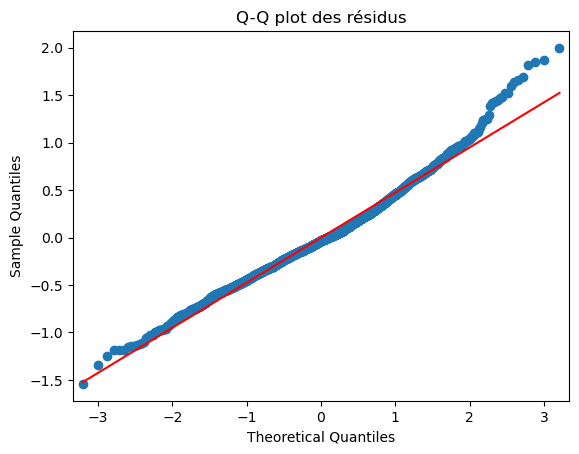

In [55]:
from statsmodels.graphics.gofplots import qqplot

# Obtention des résidus
residuals = model.resid

# Création du Q-Q plot
plt.figure(figsize=(6, 2))
qqplot(residuals, line='s')
plt.title("Q-Q plot des résidus")
plt.show()

In [56]:
# INTERPRETATION
# Le Q-Q plot suggère une légère déviation par rapport à la normalité des résidus.
# La plupart des points suivent de près la droite théorique, ce qui indique une bonne adéquation à une distribution normale.
# On observe une légère courbure aux deux extrémités du graphique :
# Les points les plus extrêmes (les plus grandes et les plus petites valeurs) s'écartent légèrement de la droite théorique.

In [57]:
## OUTIL DE VERIFICATION DE NORMALITE DES RESIDUS 3 : LE TEST DE SHAPIRO WILK
# Il s'agit de vérifier formellement la normalité des résidus.

In [58]:
from scipy.stats import shapiro

# Obtention des résidus
residuals = model.resid

# Réalisation du test de Shapiro-Wilk
stat, p = shapiro(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interprétation
alpha = 0.05
if p > alpha:
    print('On accepte l\'hypothèse nulle: les données sont probablement normales')
else:
    print('On rejette l\'hypothèse nulle: les données ne sont probablement pas normales')


Statistics=0.984, p=0.000
On rejette l'hypothèse nulle: les données ne sont probablement pas normales


<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">V - METHODE DE PREDICTION >>> LA REGRESSION LOGISTIQUE</h3>
</div>

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
## PREPARATION DES DONNEES

# Séparation des variables explicatives (X) et de la variable cible (y)
X_rg = df_billets[['diagonale', 'hauteur_gauche', 'hauteur_droite', 'marge_inf', 'marge_sup', 'longueur']]
y_rg = df_billets['nature']

# Division en ensembles d'entraînement et de test
X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(X_rg, y_rg, test_size=0.2, random_state=42)

In [61]:
## CREATION ET ENTRAINEMNT DU MODELE DE REGRESSION LOGISTIQUE

# Création du modèle
model_rg = LogisticRegression()

# Entraînement du modèle
model_rg.fit(X_train_rg, y_train_rg)

LogisticRegression()

In [62]:
## INTERPRETATION DES COEFFICIENTS

# Affichage des coefficients
print(pd.DataFrame(model_rg.coef_, columns=X_rg.columns))

   diagonale  hauteur_gauche  hauteur_droite  marge_inf  marge_sup  longueur
0  -0.278426       -1.492693       -1.942238  -3.333404  -2.997162  3.825884


In [63]:
## PREDICTION SUR L'ENSEBLE DE TEST
y_pred_rg = model_rg.predict(X_test_rg)

In [64]:
## EVALUATION DE LA PERFORMANCE DU MODELE : ACCURACY

# Calcul de la précision
accuracy_rg = accuracy_score(y_test_rg, y_pred_rg).round(5)
print("Evaluation du modèle RL avec l'accuracy :", accuracy_rg)

Evaluation du modèle RL avec l'accuracy : 0.99


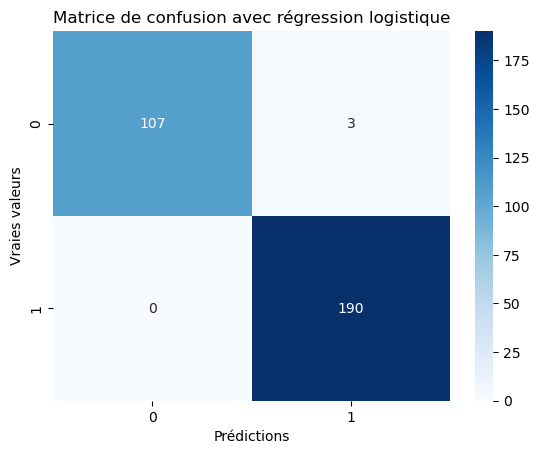

In [65]:
## EVALUATION DE LA PERFORMANCE DU MODELE : MATRICE DE CONFUSION

# Affichage de la matrice de confusion  
sns.heatmap(confusion_matrix(y_test_rg, y_pred_rg), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion avec régression logistique')
plt.show()

L'aire sous la courbe ROC est de : 0.99967


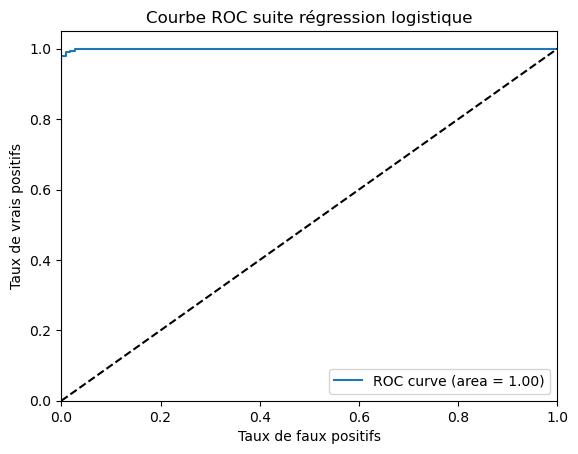

In [66]:
## EVALUATION DE LA PERFORMANCE DU MODELE : COURBE ROC

# Calcul des probabilités prédites
y_proba_rg = model_rg.predict_proba(X_test_rg)[:, 1]

# Calcul des taux de faux positifs et vrais positifs
fpr_rg, tpr_rg, thresholds_rg = roc_curve(y_test_rg, y_proba_rg)

# Calcul de l'aire sous la courbe ROC
roc_auc_rg = auc(fpr_rg, tpr_rg).round(5)
print('L\'aire sous la courbe ROC est de :', roc_auc_rg)

# Affichage de la courbe ROC
plt.plot(fpr_rg, tpr_rg, label='ROC curve (area = %0.2f)' % roc_auc_rg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC suite régression logistique')
plt.legend(loc="lower right")
plt.show()

In [67]:
## EVALUATION DE LA PERFORMANCE DU MODELE : PRECISION, RAPPEL, F1-SCORE

precision_rg = precision_score(y_test_rg, y_pred_rg).round(5)
recall_rg = recall_score(y_test_rg, y_pred_rg).round(5)
f1_rg = f1_score(y_test_rg, y_pred_rg).round(5)

print("Précision régression logistique:", precision_rg)
print("Rappel régression logistique:", recall_rg)
print("F1-score régression logistique:", f1_rg)

Précision régression logistique: 0.98446
Rappel régression logistique: 1.0
F1-score régression logistique: 0.99217


In [68]:
## EVALUATION DE LA PERFORMANCE DU MODELE : VALIDATION CROISEE K-FOLD

from sklearn.model_selection import cross_val_score

scores_rg = cross_val_score(model_rg, X_rg, y_rg, cv=5).round(3)
print("Scores de validation croisée régression logistique :", scores_rg)
print("Score moyen régression logistique :", scores_rg.mean())

Scores de validation croisée régression logistique : [0.987 0.983 0.997 0.987 0.99 ]
Score moyen régression logistique : 0.9888


<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">VI - METHODE DE PREDICTION >>> LE KNN</h3>
</div>

In [69]:
from sklearn.neighbors import KNeighborsClassifier

# Séparation des variables explicatives (X) et de la variable cible (y)
X_knn = df_billets[['diagonale', 'hauteur_gauche', 'hauteur_droite', 'marge_inf', 'marge_sup', 'longueur']]
y_knn = df_billets['nature']

# Division en ensembles d'entraînement et de test
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

In [70]:
## DETERMINATION DE LA MEILLEUR VALEUR DE K

from sklearn.model_selection import GridSearchCV

# Création d'un dictionnaire avec les valeurs de K à tester
param_grid_knn = {'n_neighbors': np.arange(1, 21)}

# Création d'un objet GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

# Entrainement du modèle sur toutes les combinaisons de paramètres
grid_knn.fit(X_train_knn, y_train_knn)

# Affichage du meilleur parametre et du meilleur score
print(grid_knn.best_params_)
print(grid_knn.best_score_)


{'n_neighbors': 6}
0.9908333333333333


In [71]:
## CREATION ET ENTRAINEMENT DU MODELE KNN

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=6)

In [72]:
## PREDICTION SUR L'ENSEMBLE DE TEST

y_pred_knn = knn.predict(X_test_knn)

In [73]:
## EVALUATION DE LA PERFORMANCE DU MODELE : ACCURACY

# Calcul de la précision
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn).round(5)
print("Evaluation du modèle KNN avec l'accuracy :", accuracy_knn)

Evaluation du modèle KNN avec l'accuracy : 0.99


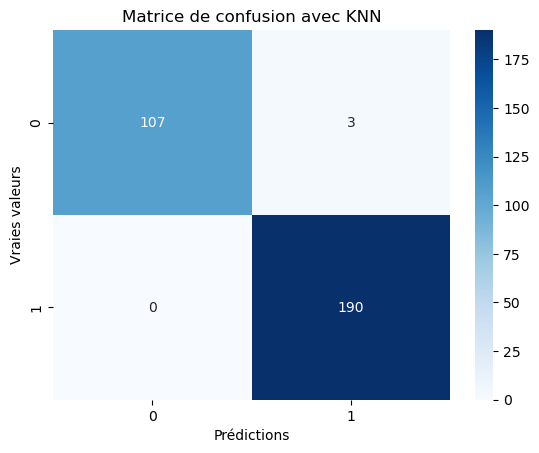

In [74]:
## EVALUATION DE LA PERFORMANCE DU MODELE : MATRICE DE CONFUSION

sns.heatmap(confusion_matrix(y_test_knn, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion avec KNN')
plt.show()

L'aire sous la courbe ROC est de : 0.99536


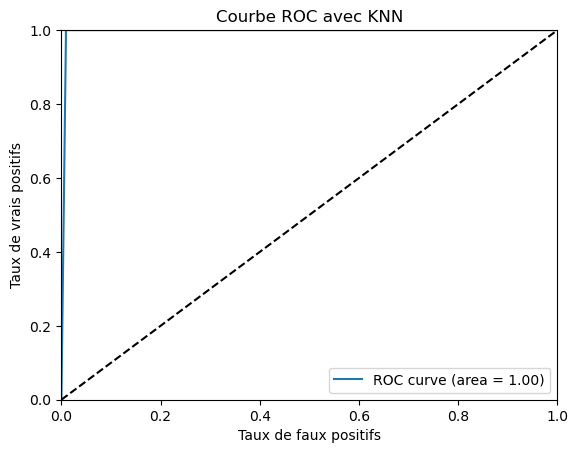

In [75]:
## EVALUATION DE LA PERFORMANCE DU MODELE : COURBE ROC

y_proba_knn = knn.predict_proba(X_test_knn)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_knn, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn).round(5)
print('L\'aire sous la courbe ROC est de :', roc_auc_knn)

plt.plot(fpr_knn, tpr_knn, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC avec KNN')
plt.legend(loc="lower right")
plt.show()

In [76]:
## EVALUATION DE LA PERFORMANCE DU MODELE : PRECISION, RAPPEL, F1-SCORE

precision_knn = precision_score(y_test_knn, y_pred_knn).round(5)
recall_knn = recall_score(y_test_knn, y_pred_knn).round(5)
f1_knn = f1_score(y_test_knn, y_pred_knn).round(5)

print("Précision KNN :", precision_knn)
print("Rappel KNN :", recall_knn)
print("F1-score KNN :", f1_knn)

Précision KNN : 0.98446
Rappel KNN : 1.0
F1-score KNN : 0.99217


In [77]:
## EVALUATION DE LA PERFORMANCE DU MODELE : VALIDATION CROISEE K-FOLD

scores_knn = cross_val_score(knn, X_knn, y_knn, cv=5).round(3)
print("Scores de validation croisée KNN :", scores_knn)
print("Score moyen KNN :", scores_knn.mean())

Scores de validation croisée KNN : [0.983 0.983 0.997 0.993 0.99 ]
Score moyen KNN : 0.9892


<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">VIII - METHODE DE PREDICTION >>> LE RANDOM FOREST</h3>
</div>

In [78]:
from sklearn.ensemble import RandomForestClassifier

## PREAPRATION DES DONNEES

# Séparation des variables explicatives (X) et de la variable cible (y)
X_rf = df_billets[['diagonale', 'hauteur_gauche', 'hauteur_droite', 'marge_inf', 'marge_sup', 'longueur']]
y_rf = df_billets['nature']

# Division en ensembles d'entraînement et de test
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [79]:
## CREATION ET ENTRAINEMENT DU MODELE DE FORET ALEATOIRE

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(n_estimators=500, random_state=42)

In [80]:
## PREDICTION SUR L'ENSEMBLE DE TEST

y_pred_rf = rf.predict(X_test_rf)

In [81]:
## EVALUATION DE LA PERFORMANCE DU MODELE : ACCURACY

accuracy_rf = accuracy_score(y_test_rf, y_pred_rf).round(5)
print("Evaluation du modèle RF avec l'accuracy :", accuracy_rf)

Evaluation du modèle RF avec l'accuracy : 0.99


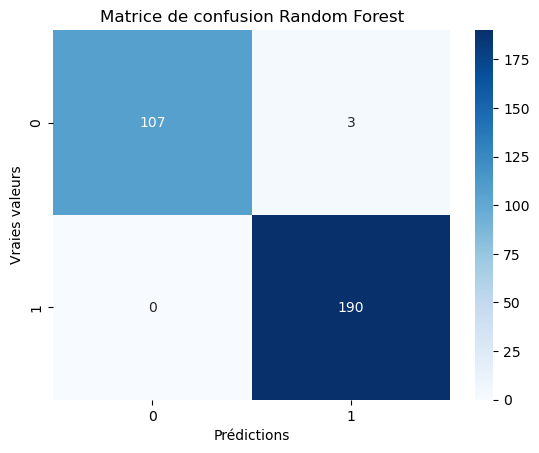

In [82]:
## EVALUATION DE LA PERFORMANCE DU MODELE : MATRICE DE CONFUSION

sns.heatmap(confusion_matrix(y_test_rf, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion Random Forest')
plt.show()

L'aire sous la courbe ROC est de : 0.9999


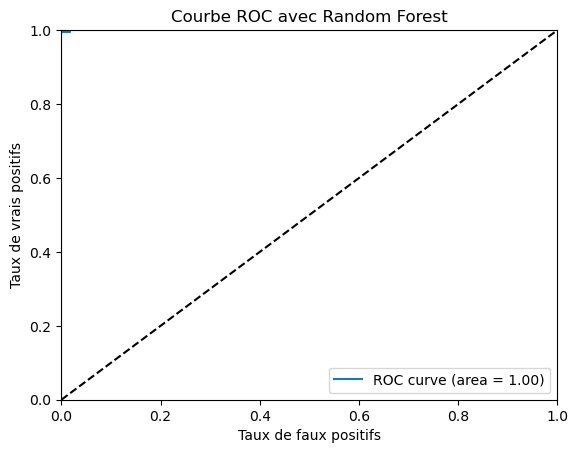

In [83]:
## EVALUATION DE LA PERFORMANCE DU MODELE : COURBE ROC

y_proba_rf = rf.predict_proba(X_test_rf)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf).round(5)
print('L\'aire sous la courbe ROC est de :', roc_auc_rf)

plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC avec Random Forest')
plt.legend(loc="lower right")
plt.show()

In [84]:
## EVALUATION DE LA PERFORMANCE DU MODELE : PRECISION, RAPPEL, F1-SCORE

precision_rf = precision_score(y_test_rf, y_pred_rf).round(5)
recall_rf = recall_score(y_test_rf, y_pred_rf).round(5)
f1_rf = f1_score(y_test_rf, y_pred_rf).round(5)

print("Précision Random Forest :", precision_rf)
print("Rappel Random Forest :", recall_rf)
print("F1-score Random Forest :", f1_rf)

Précision Random Forest : 0.98446
Rappel Random Forest : 1.0
F1-score Random Forest : 0.99217


In [85]:
## EVALUATION DE LA PERFORMANCE DU MODELE : VALIDATION CROISEE K-FOLD

scores_rf = cross_val_score(rf, X_rf, y_rf, cv=5).round(3)
print("Scores de validation croisée Random Forest :", scores_rf)
print("Score moyen Random Forest :", scores_rf.mean())

Scores de validation croisée Random Forest : [0.993 0.983 0.997 0.997 0.987]
Score moyen Random Forest : 0.9914


<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite;">
<h3 style="margin: auto; color: steelblue;">VII - METHODE DE PREDICTION >>> LE K-MEANS</h3>
</div>

In [86]:
## PREAPRATION DES DONNEES

# Séparation des variables explicatives (X) et de la variable cible (y)
X_kmeans = df_billets[['diagonale', 'hauteur_gauche', 'hauteur_droite', 'marge_inf', 'marge_sup', 'longueur']]
y_kmeans = df_billets['nature']

# Division en ensembles d'entraînement et de test
X_train_kmeans, X_test_kmeans, y_train_kmeans, y_test_kmeans = train_test_split(X_kmeans, y_kmeans, test_size=0.2, random_state=42)

In [87]:
## CREATION D'UN NOUVEAU DF 

# Création d'une copie de df_billets sans la colonne 'nature'
df_billets_kmeans = df_billets.drop(columns=['nature'])

# Affichage du nouveau df
display(df_billets_kmeans.head())

,diagonale,hauteur_gauche,hauteur_droite,marge_inf,marge_sup,longueur
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


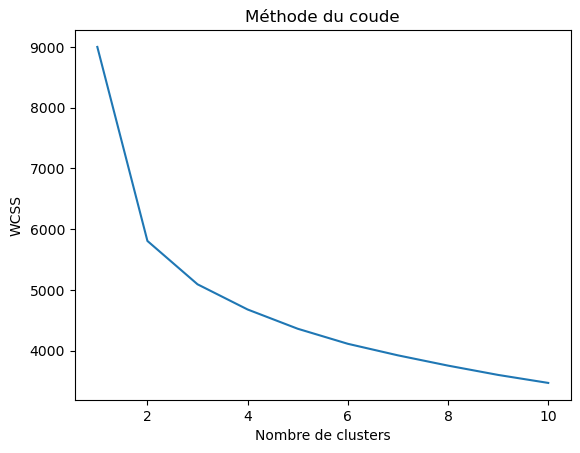

In [88]:
## UTILSATION DE LA METHODE DU COUDE POUR DEFINIR LE NOMBRE DE CLUSTER OPTIMAL

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardisation des données (important pour K-means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_billets_kmeans)

# Technique du coude pour déterminer le nombre de clusters optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [89]:
## REALISATION DU KMEANS AVEC LE NOMBRE DE CLUSTERS PERTINENTS

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_kmeans)
X_test_scaled = scaler.transform(X_test_kmeans)

# Réalisation du k-means et entraînement
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_train_scaled)

# Stockage des clusters dans une variable labels 
labels = kmeans.labels_
labels

array([0, 0, 1, ..., 0, 1, 1])

In [90]:
# Prédiction sur l'ensemble de test
y_pred_kmeans = kmeans.predict(X_test_scaled)

# Création d'un nouveau df pour les prédictions
df_pred_kmeans = pd.DataFrame(X_test_kmeans)
df_pred_kmeans['cluster'] = y_pred_kmeans

# Affichage
X_test_scaled

array([[ 0.9857714 , -0.43290028,  0.61319337,  0.78611213,  1.16117725,
        -1.61589763],
       [-0.99922162,  0.96203445,  1.4101787 ,  1.78944849,  0.38437384,
        -0.44385789],
       [-1.38971205, -1.66177136, -0.88881746, -0.65808414, -0.82398703,
         0.07957733],
       ...,
       [ 1.34372096,  1.69271455,  0.33731383,  2.04788361,  1.11802151,
        -1.41107515],
       [-0.54364945,  2.75552197,  1.28756558,  1.39419477, -0.04718361,
         0.37543201],
       [ 0.46511749,  0.19814162, -0.27575182,  0.02600883,  0.42752958,
         0.77369794]])

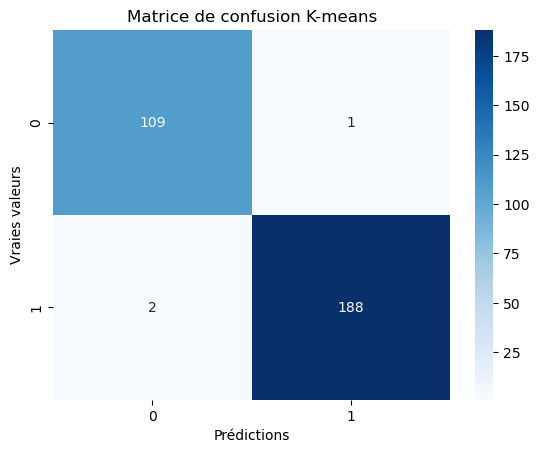

In [91]:
## EVALUATION DE LA PERFORMANCE DU MODELE : MATRICE DE CONFUSION

# Inversement des labels prédits
y_pred_kmeans_inverse = np.where(y_pred_kmeans == 0, 1, 0)

# Création de la matrice de confusion avec les nouveaux labels
sns.heatmap(confusion_matrix(y_test_kmeans, y_pred_kmeans_inverse), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion K-means')
plt.show()

In [92]:
## EVALUATION DE LA PERFORMANCE DU MODELE : PRECISION, RAPPEL, F1-SCORE

precision_kmeans = precision_score(y_test_kmeans, y_pred_kmeans_inverse).round(3)
recall_kmeans = recall_score(y_test_kmeans, y_pred_kmeans_inverse).round(3)
f1_kmeans = f1_score(y_test_kmeans, y_pred_kmeans_inverse).round(3)

print("Precision K-means :", precision_kmeans)
print("Rappel K-means :", recall_kmeans)
print("F1-score K-means :", f1_kmeans)

Precision K-means : 0.995
Rappel K-means : 0.989
F1-score K-means : 0.992


In [93]:
## COMPARAISON DES VALEURS REELLES AVEC LES VALEURS PREDITES

# Création d'une copie du df
df_kmeans_train = X_train_kmeans.copy()

# Création d'une colonne dans notre table en ajoutant les labels calculés par le modele
df_kmeans_train['cluster'] = labels

display(df_kmeans_train.head())

,diagonale,hauteur_gauche,hauteur_droite,marge_inf,marge_sup,longueur,cluster
382,172.28,104.62,103.80,4.08,3.08,113.26,0
538,171.90,104.50,103.49,4.08,2.82,113.50,0
1493,171.63,104.33,104.61,4.88,3.35,112.16,1
1112,172.06,104.28,104.31,5.61,3.27,111.61,1
324,172.10,104.42,103.60,4.18,2.89,113.32,0


In [94]:
# Séléction de la colonne 'nature' de df_billets uniquement
df_billets_nature = df_billets[['nature']]

# Création d'une jointure entre 2 df pour comparer les valeurs réelles nature et les valeurs prédites cluster
df_kmeans_compar = pd.merge(df_kmeans_train, df_billets_nature, left_index=True, right_index=True)

# Création d'une nouvelle colonne 'nature_binaire'
df_kmeans_compar['nature_binaire'] = df_kmeans_compar['nature'].apply(lambda x: 0 if x else 1)

display(df_kmeans_compar.head())

,diagonale,hauteur_gauche,hauteur_droite,marge_inf,marge_sup,longueur,cluster,nature,nature_binaire
382,172.28,104.62,103.80,4.08,3.08,113.26,0,True,0
538,171.90,104.50,103.49,4.08,2.82,113.50,0,True,0
1493,171.63,104.33,104.61,4.88,3.35,112.16,1,False,1
1112,172.06,104.28,104.31,5.61,3.27,111.61,1,False,1
324,172.10,104.42,103.60,4.18,2.89,113.32,0,True,0


In [95]:
# Identification des lignes où les valeurs sont différentes
lignes_différentes = df_kmeans_compar[df_kmeans_compar['cluster'] != df_kmeans_compar['nature_binaire']]

# Compter le nombre de lignes différentes
nombre_lignes_différentes = lignes_différentes.shape[0]

# Afficher le résultat
print("Nombre de lignes en erreur :", nombre_lignes_différentes)

# Affichage
lignes_différentes

Nombre de lignes en erreur : 19


,diagonale,hauteur_gauche,hauteur_droite,marge_inf,marge_sup,longueur,cluster,nature,nature_binaire
1083,171.85,103.60,103.82,4.600000,3.21,112.50,0,False,1
1362,171.56,103.80,103.87,5.660000,2.98,112.95,0,False,1
1412,172.25,103.94,103.68,4.140000,3.25,112.48,0,False,1
946,171.63,103.87,104.66,4.711299,3.27,112.68,1,True,0
1160,172.39,104.05,104.32,4.130000,3.41,112.66,0,False,1
1103,171.88,104.05,103.75,4.410000,3.21,112.52,0,False,1
0,171.81,104.86,104.95,4.520000,2.89,112.83,1,True,0
341,171.90,104.21,104.21,4.770000,3.38,113.20,1,True,0
728,171.94,104.11,104.16,4.080000,3.35,111.76,1,True,0
1407,172.02,103.99,104.28,4.220000,2.98,112.42,0,False,1


<div style="border: 1px solid steelblue; border-radius: 8px; padding: 20px; background-color: ghostwhite; text-align: center;">
<h3 style="font-size: 24px; margin: auto; color: steelblue;">PARTIE 2 dans le notebook suivant</h3>
</div>

In [96]:
## J'ai choisi de garder le modèle prédictif RANDOM FOREST


In [97]:
# Enregistrement du modèle pour pouvoir l'utiliser dans le notebook PARTIE 2

import joblib
joblib.dump(rf, 'modele_random_forest.joblib')

['modele_random_forest.joblib']